<a href="https://colab.research.google.com/github/cammylexi/MachineLearning-Data-Visualization/blob/main/Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Assignment One: Exploring Table Data**
Camryn McPhaul, Miles Landon Youngblood, Shuhan Wu

# Business Understanding

## Overview of the Dataset

This cybercrime forensic dataset contains 7,400 observations of simulated cyber activities [1]. It logs user interactions with a system, which include network activity, file access, system logins, and anomalies flagged for security concerns [1]. The important features in this dataset are Activity_Type, IP_Address, Resource_Accessed, Anomaly_Type, and a binary classification label Normal or Suspicious [1]. The data has both categorical and numerical attributes, making it suitable for machine learning tasks.

## Purpose of the Dataset

The dataset was created for cybersecurity research to simulate real-world activity and anomalies for forensic analysis. The source of this dataset does not specifically state how they got this data. However, the dataset reflects scenarios where security systems monitor user behavior and determine potential threats like unauthorized file deletions, Distributed Denial of Service attacks (DDoS), and brute-force login attempts [1]. Therefore, the purpose of this data is to enable training and better evaluate machine learning models that detect anomalies and malicious activities [1].

## Third-Party Interest

The main prediction in this dataset is to determine whether the user activity is normal or suspicious. This is important information for detecting cyberattacks, unauthorized file access, or changes and for preventing potential data breaches. Third parties would be interested in this dataset because of its focus on cybersecurity and digital forensics [1]. Reseachers, cybersecurity professionals, and data scienctist  can use the data to detect and mitigate digital security threats proactively. Cybersecurity firms can leverage the dataset to improve the accuracy of anomaly detection tools and develop more robust threat intelligence solutions for their clients [1]. Furthermore, law enforcement may find this data useful for post-attack analysis and evidence gathering to help trace where the malicious activity came from [1]. Ultimately, this dataset can increase the effectiveness of Intrusion Detection Systems (IDS) while reducing the manual effort required to monitor logs by automating anomaly detection.    

## Performance Expectations

The prediction algorithm must perform at a good precision to avoid falsifying normal activity as suspicious. Most importantly, make sure that suspicious activity is not passed for normal. To be useful the algorithm might need an 100% accuracy with a high F1 score for balance detection -- given the high stake in cybersecurity [2,3]. Without this level of accuracy the company and personal information of many can be at stake to be stolen or tampered with. Any performance that is lower could lead to missed attacks and unnecessary panic due to false alarms.





#Reference

[1] Legendary, “Cybercrime Forensic Dataset,” Kaggle.com, 2023. https://www.kaggle.com/datasets/jimohyusuf/cybercrime-forensic-dataset?select=cybercrime_forensic_dataset.csv (accessed Feb. 07, 2025).
  


<br>[2] “ChatGPT,” ChatGPT, 2025. https://chatgpt.com/


<br>[3] GeeksforGeeks, “F1 Score in Machine Learning,” GeeksforGeeks, Dec. 27, 2023. https://www.geeksforgeeks.org/f1-score-in-machine-learning/

<br>[4] M. Babu, “Attack Chain Methodology: Aligning AppSec Strategies with Real-World Threats | Kodem,” Kodemsecurity.com, 2024. https://www.kodemsecurity.com/resources/attack-chain-methodology-aligning-appsec-strategies-with-real-world-threats (accessed Feb. 10, 2025).
‌

#Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('cybercrime_forensic_dataset.csv')
df.head()

Pandas: 2.2.2
Numpy: 1.26.4


,Timestamp,User_ID,IP_Address,Activity_Type,Resource_Accessed,File_Name,Action,Login_Attempts,File_Size,Anomaly_Type,Label
0,2024-09-27 12:53:26.390859,9288,10.174.236.5,File_Modification,/network/logs/new_project.docx,new_project.docx,Delete,NaN,30.66,DDoS_Attempt,Suspicious
1,2024-10-02 15:13:49.741543,1605,172.19.128.216,USB_Insert,/server/secrets.txt,NaN,Read,NaN,NaN,Brute_Force,Suspicious
2,2024-09-13 14:31:39.163288,3056,192.168.201.132,File_Modification,/project/document2.docx,document2.docx,NaN,NaN,21.61,DDoS_Attempt,Suspicious
3,2024-10-02 22:27:57.622008,1564,10.119.122.121,Network_Traffic,/backup/document2.docx,NaN,Delete,NaN,NaN,NaN,Normal
4,2024-10-01 08:00:55.017797,3660,172.23.2.38,USB_Insert,/confidential/report1.pdf,NaN,Write,NaN,NaN,NaN,Normal


In [ ]:
df.describe()

,User_ID,Login_Attempts,File_Size
count,7400.000000,2105.000000,3196.000000
mean,5535.768378,5.428504,24.669703
std,2575.574425,2.862625,14.133492
min,1000.000000,1.000000,0.130000
25%,3358.750000,3.000000,12.635000
50%,5516.000000,5.000000,24.590000
75%,7755.000000,8.000000,36.782500
max,9997.000000,10.000000,49.980000


##**Data Attributes** [1]

**Timestamp**: Date and time of the activity, necessary for tracking events in cybercrime.

**User_ID**: A Unique user identifier, used to trace specific actions to individual users.

**IP_Address**: IP address of which the user activity originates. This is used for geolocation tracing, and identifying suspicious external or internal access points.

**Activity_Type**:
* Login
* File Access
* File Modification
* File Deletion
* Network Traffic
* Remote Login
* USB Insert

**Resource_Accessed:** The file or system resource accessed during the activity.

**File_Name:** The file name involved with the activity (if applicable).

**Action:** The specific action taken (read, write, delete)

**Login_Attempts:** The number of login attempts (if applicable).

**File_Size:** The size of the file accessed (if applicable).

**Anomoly_Type:** Type of anomaly detected
* Brute_Force
* DDos_Attempt
* Data_Exfil
* USB_Access
* None

**Label:** Classification; "Normal" or "Suspicious"

###Data Types

In [ ]:
# Convert data types
df["Timestamp"] = pd.to_datetime(df["Timestamp"]) #[2]
df["IP_Address"] = df["IP_Address"].astype("string") #[2]
df["Activity_Type"] = df["Activity_Type"].astype("category") #[2]
df["Resource_Accessed"] = df["Resource_Accessed"].astype("string") #[2]
df["File_Name"] = df["File_Name"].astype("string") #[2]
df["Action"] = df["Action"].astype("category") #[2]
df["Anomaly_Type"] = df["Anomaly_Type"].astype("category") #[2]
df["Label"] = df["Label"].astype("category") #[2]

# Verify changes
print(df.dtypes)
print('===========')
print(df.info())

Timestamp            datetime64[ns]
User_ID                       int64
IP_Address           string[python]
Activity_Type              category
Resource_Accessed    string[python]
File_Name            string[python]
Action                     category
Login_Attempts              float64
File_Size                   float64
Anomaly_Type               category
Label                      category
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          7400 non-null   datetime64[ns]
 1   User_ID            7400 non-null   int64         
 2   IP_Address         7400 non-null   string        
 3   Activity_Type      7400 non-null   category      
 4   Resource_Accessed  7400 non-null   string        
 5   File_Name          3196 non-null   string        
 6   Action             6348 non-null   cat

##**Missing Values**

File_Name:      4,204

Action:         1,052

Login_Attempts: 5,295

File_Size:      4,204

---

##**Explanations**

File_Name and File_Size were missing from entires where there were no files involved in the activity.The absent of this data was not an error.

Actions were not recorded whenever the system  were not able to log the activity or the activity did not involve recordable actions.The absence of data might occur due to system limitations, incomplete logging, or the nature of the activity itself such as passive activities.

Login_Attempts are missing where an activity did not involve a login event.This is logical since login attempts are only relevant to login-related activities.

---

##Handling Missing Values
###**Justifications**

File_Name and File_Size were eliminated rather than imputing since there either is a file name and size, or there isn't one. The same logic applies for Actions and Login_Attempts: they either exist within the context of the activity or they do not. Imputing values for such fields would introduce artificial data that could misrepresent the actual nature of the dataset.

###Visualization for Missing Values

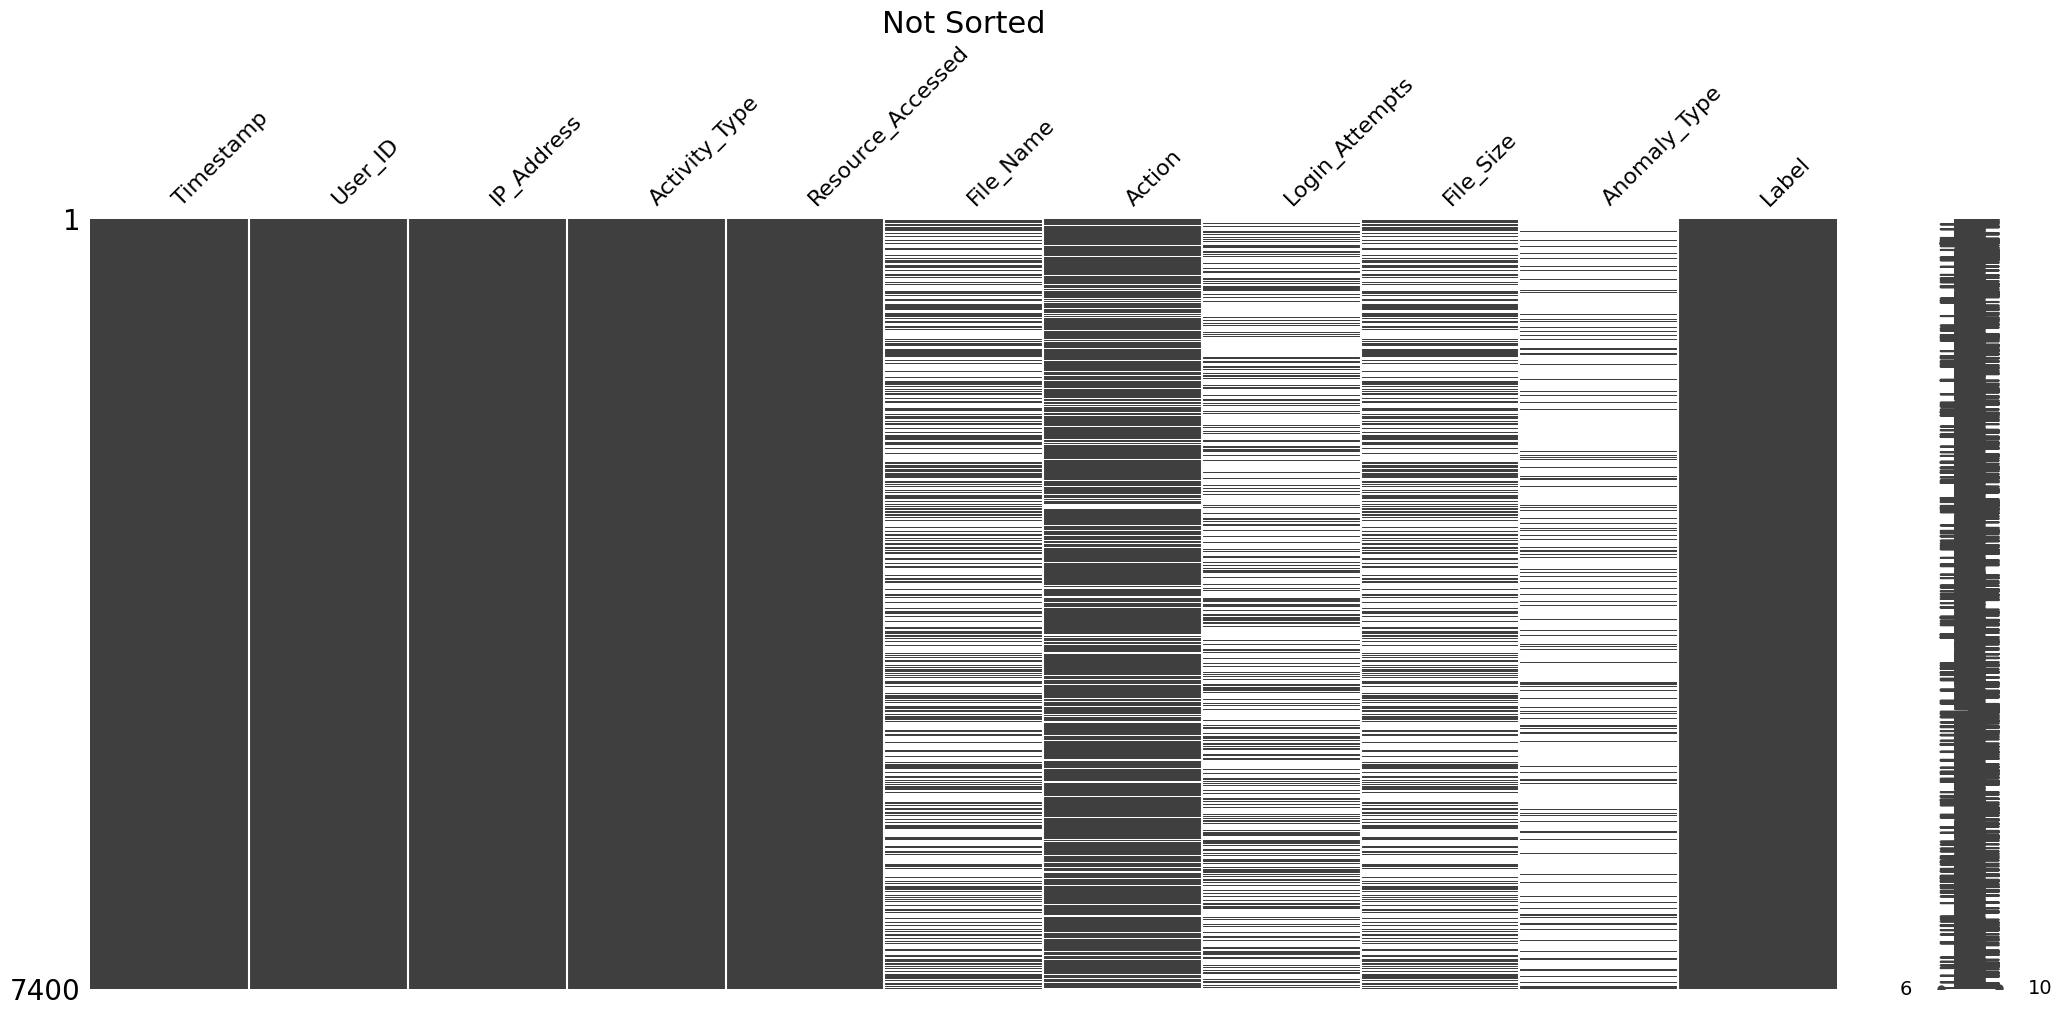

<Figure size 640x480 with 0 Axes>

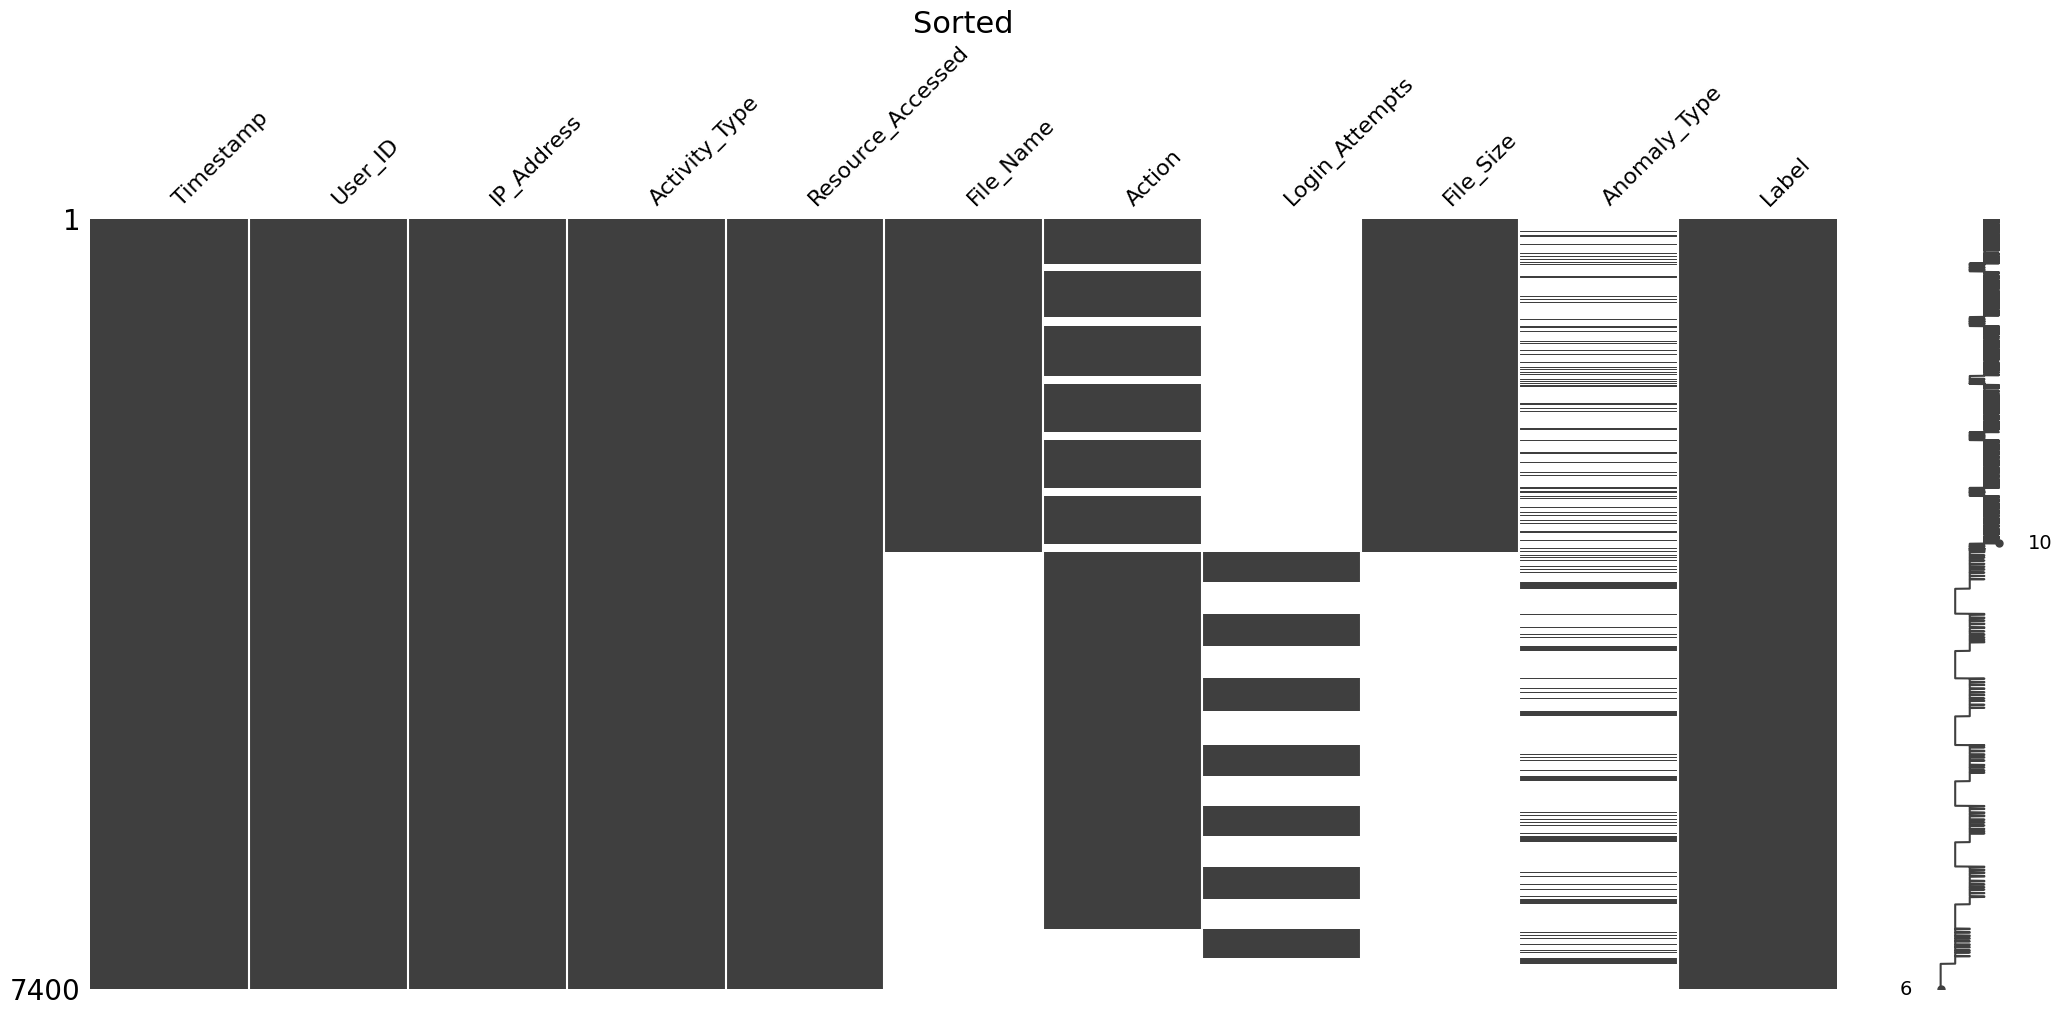

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.figure()

mn.matrix(df.sort_values(by=["File_Name", "Action", "Login_Attempts", "File_Size", "Anomaly_Type"]))
plt.title("Sorted", fontsize=22)
plt.show()

In [ ]:
print(df.isnull().sum()) #[2]

Timestamp               0
User_ID                 0
IP_Address              0
Activity_Type           0
Resource_Accessed       0
File_Name            4204
Action               1052
Login_Attempts       5295
File_Size            4204
Anomaly_Type         6167
Label                   0
dtype: int64


#  Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline


### Categorical: Pie Chart
Normal vs. Suspicious Activities

---



This chart provides an overview of the dataset, displaying the proportion of normal and suspicious activities based on the 7,400 observations.

Normal activities account for 83.3% of the total, while suspicious activities make up 16.7%.



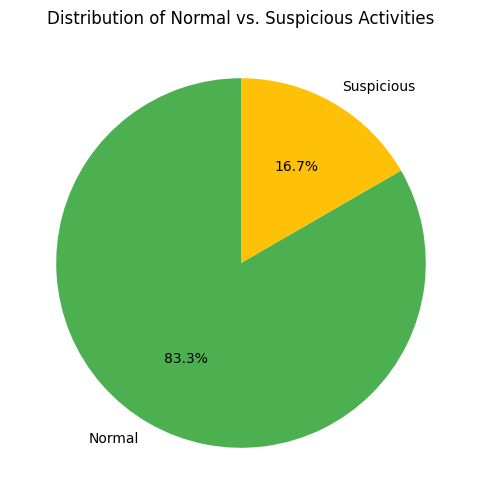

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df['Label'].value_counts(), labels=df['Label'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Distribution of Normal vs. Suspicious Activities')
plt.show()

In [ ]:
df_grouped = df.groupby(by='Label')
for val, grp in df_grouped:
  print(f'There were {len(grp)} observations labeled as {val}.')

There were 6167 observations labeled as Normal.
There were 1233 observations labeled as Suspicious.


###Plot: Histogram

>  Distributions of Files_Size

This plot gives an overview of the count of each file size. This can help in determining the range of typical file sizes accessed within the system. For example, it can highlight whether most accessed files are small.


Text(0.5, 1.0, 'Distribution of File Size')

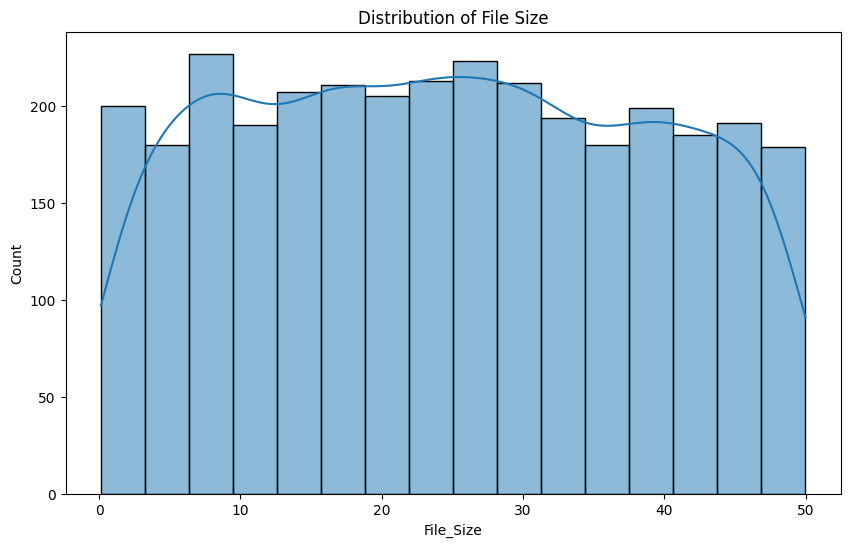

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.File_Size, kde=True) #[2]
plt.title("Distribution of File Size")

### Plot: Violin Plot
Distribution of File Size

Text(0.5, 1.0, 'Distribution of File_Size')

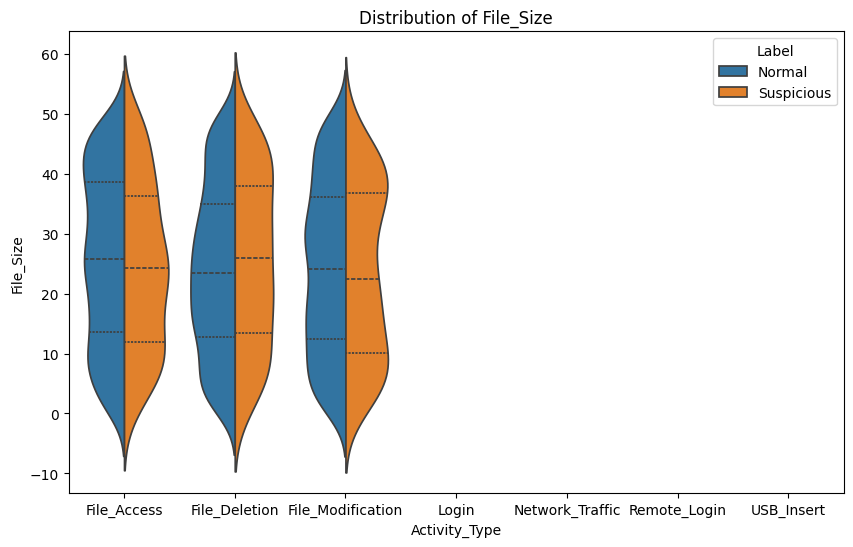

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Activity_Type", y="File_Size", hue="Label", data=df,
               split=True, inner="quart") #[2]
plt.title("Distribution of File_Size")

According to the plots, different activities types and labels do not consistently share the same spread or shape of file size distributions. File_Size only appears in the columns related to "File" cybercrime activities.
*   The distribution of file size in "suspicious" File Modification is approximately binomal, but the distribution of file size in "normal" File Modification is approximately unimodal.

  Meaning: File Modification activities often target specific file sizes, while normal ones don't show this pattern.
*   The distribution of file size in File Access labeled "suspicious" and "normal" are both approximately unnimodal.

  Meaning: For File Access, file size doesn’t seem to help in identifying suspicious behavior since both normal and suspicious activities look similar.
*   The distribution of file size in File Deletion labeled "suspicious" is approximately normal, but the distribution of file size in File Deletion labeled "normal" is unimodal.
  
  Meaning: Suspicious File Deletion activities follow a predictable, unlike normal deletions.

## Additional Analysis: Distributions of Login_Attempts




According to the plot, different activities
have various spread and shape of Login_Attempts between "suspicious" and "normal" labels. (Login_Attempts only appears in the columns related to "Login" cybercrime activities.)
*   The distribution of login attempts in Login activity labeled "suspicious" shows to maintain a relatively consistent pattern across login attempts, especially in comparison to normal activities. Whereas normal logins hare unnimodal, showing a single peak toward the lower Login_Attempts. This consistencey may indicate that automated scripts and attacker keep a more steady login attempt to seem more human, rather than fluctuating behavior seen in normal users.

*   The distribution of login attempts in remote-login activity labeled "suspicious" and "normal" are both approximately unimodal. However, normal login attempts are more concentrated around a single peak than suspicious logins. The suspicious logins are more distrubuted evenly, so seem like legitmate users.

The consistent pattern of suspicious login attempts suggests a methodical attack strategy, where automated tools persistent in evading security measures [4]. This highlights the need for  behavior-based detection, multi-factor authentication, and long-term monitoring to identify low-volume, high-frequency attack patterns.


<br>Note: The files don't have anything to do with the login attempts

Text(0.5, 1.0, 'Distribution of Login_Attempts')

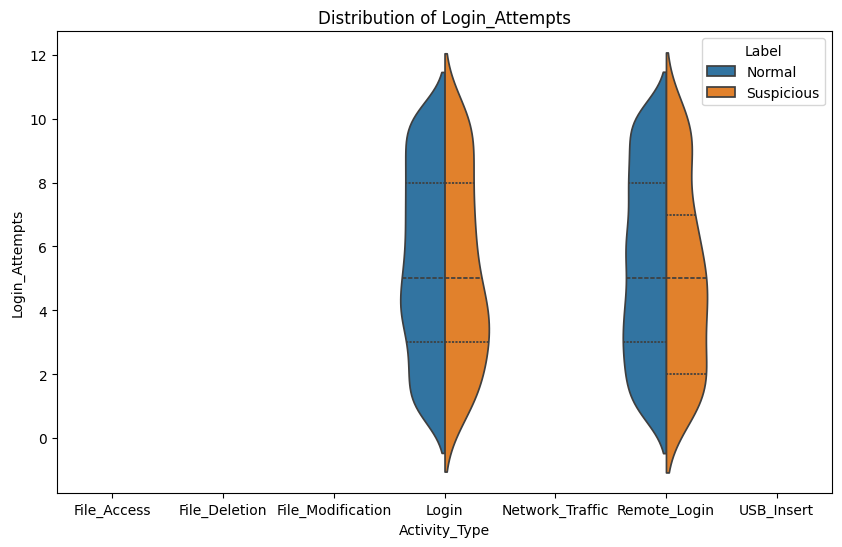

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Activity_Type", y="Login_Attempts", hue="Label", data=df,
               split=True, inner="quart") #[2]
plt.title("Distribution of Login_Attempts")

##Plot: Box Plot

According the box plot, there is not a significant difference in file size distributions between the 'Normal' and 'Suspicious' labels.

This indicates that file size alone may not be a strong factor for identifying suspicious activities. There may need to be combined with other features for better anomaly detection or classification.

Text(0.5, 1.0, 'Boxplot of File_Sieze grouped by Label')

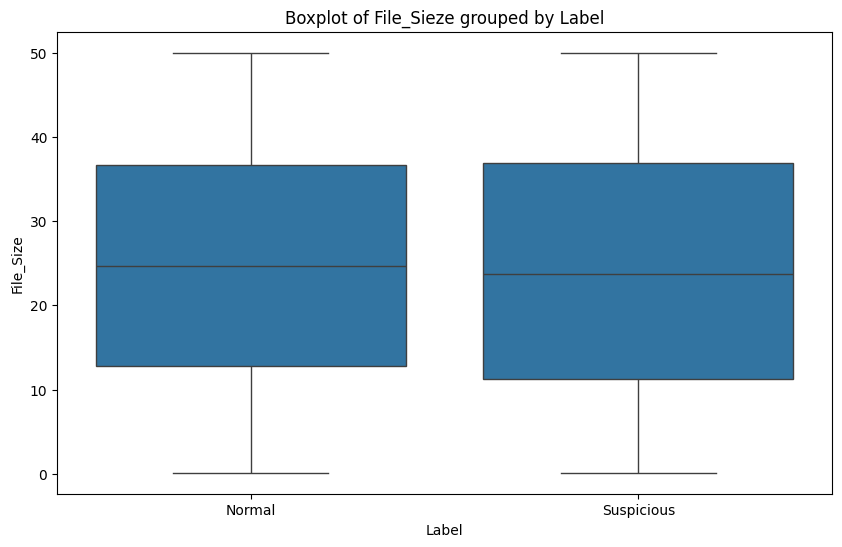

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Label", y="File_Size", data=df)
plt.title('Boxplot of File_Sieze grouped by Label')

##Categorical: Bar Chart
"Suspicious" Percentage by Activity Type

According the bar chart, among suspicious activities, USB insertion accounts for largest proportion with approximate 19.3%.

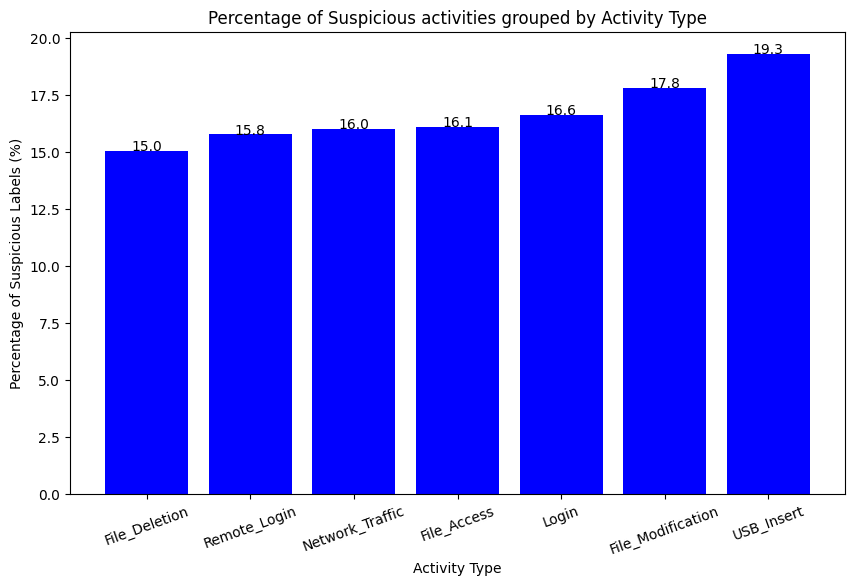

In [ ]:
def addlabels(x, y):#[2]
    for i in range(len(x)):#[2]
        plt.text(i, y[i], f'{y[i]:,.1f}', ha='center')#[2]



grouped2 = df.groupby(['Activity_Type', 'Label']).size().unstack(fill_value=0)
grouped2['Total'] = grouped2['Suspicious'] + grouped2['Normal']
grouped2['Suspicious_Percentage'] = (grouped2['Suspicious'] / grouped2['Total']) * 100
grouped_sorted = grouped2.sort_values(by='Suspicious_Percentage', ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(grouped_sorted.index, grouped_sorted['Suspicious_Percentage'], color='blue') #Sorting
addlabels(grouped_sorted.index, grouped_sorted['Suspicious_Percentage'])
plt.xlabel('Activity Type')
plt.ylabel('Percentage of Suspicious Labels (%)')
plt.title('Percentage of Suspicious activities grouped by Activity Type')
plt.xticks(rotation=20)
plt.show()

The approximate values are below:

In [ ]:

# Check the number of suspicious activities per activity type
grouped3 = df.groupby(by=['Activity_Type', 'Label'])
for val, grp in grouped3:
    if val[1] == 'Suspicious': # Only considering suspicious activities
        print(f"There were {len(grp)} suspicious cybercrime incidents in {val[0]} Activity Type.")

There were 176 suspicious cybercrime incidents in File_Access Activity Type.
There were 156 suspicious cybercrime incidents in File_Deletion Activity Type.
There were 190 suspicious cybercrime incidents in File_Modification Activity Type.
There were 175 suspicious cybercrime incidents in Login Activity Type.
There were 171 suspicious cybercrime incidents in Network_Traffic Activity Type.
There were 166 suspicious cybercrime incidents in Remote_Login Activity Type.
There were 199 suspicious cybercrime incidents in USB_Insert Activity Type.


##Categorical: Bar Chart

Frequency of Anomaly Types per Activity Type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'File_Access'),
  Text(1, 0, 'File_Deletion'),
  Text(2, 0, 'File_Modification'),
  Text(3, 0, 'Login'),
  Text(4, 0, 'Network_Traffic'),
  Text(5, 0, 'Remote_Login'),
  Text(6, 0, 'USB_Insert')])

<Figure size 1000x600 with 0 Axes>

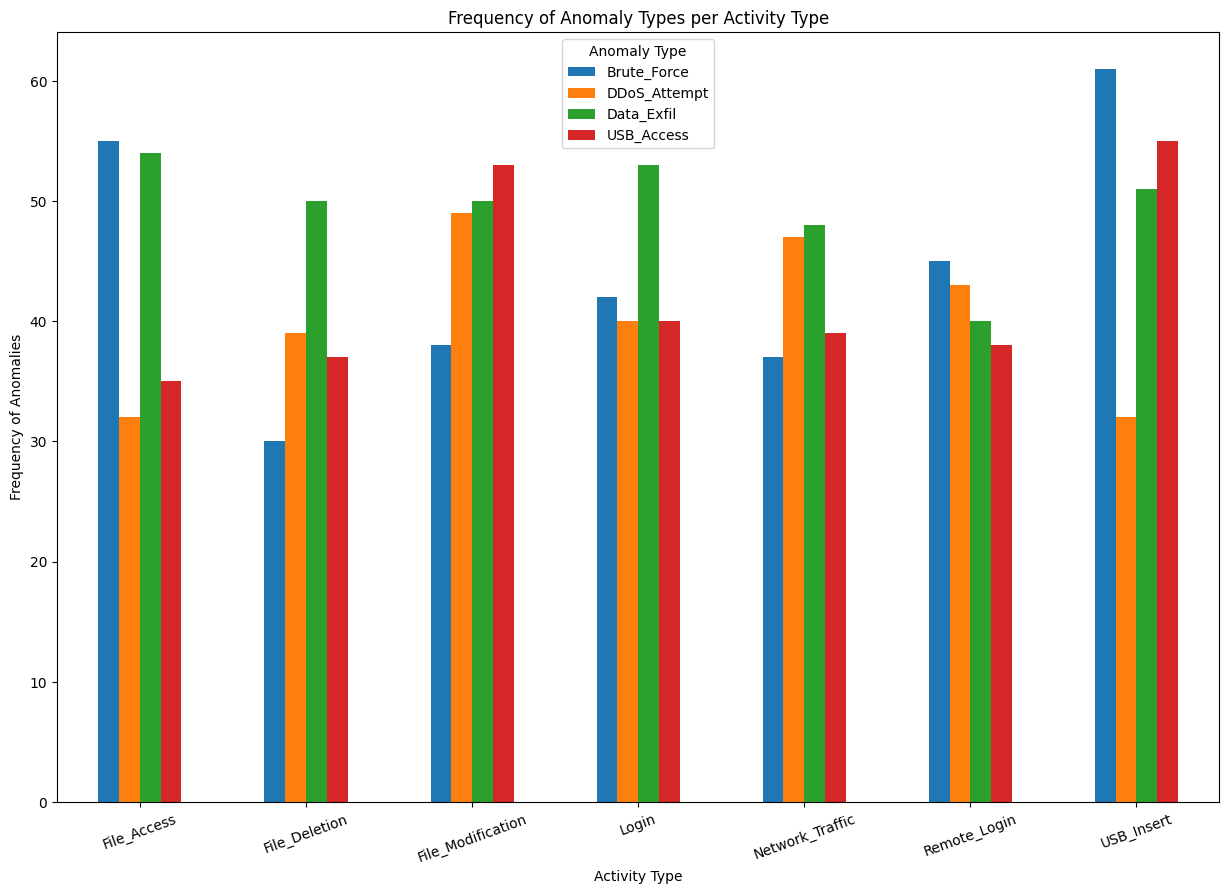

In [ ]:
grouped_data = df.groupby(['Activity_Type', 'Anomaly_Type']).size().reset_index(name='Counts') #[2]
pivot_data = grouped_data.pivot(index='Activity_Type', columns='Anomaly_Type', values='Counts').fillna(0) #[2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Frequency of Anomaly Types per Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Frequency of Anomalies')
plt.legend(title='Anomaly Type')
plt.xticks(rotation=20)


In [ ]:
# Check the actual count of most frequently appeared anomaly type in per activity type (With code help from ChatGPT)
highest_frequencies = pivot_data.apply(lambda x: (x.idxmax(), x.max()), axis=1)
highest_frequencies = pd.DataFrame(highest_frequencies.tolist(), index=pivot_data.index, columns=['Anomaly Type', 'Max Count'])
print(highest_frequencies)

                  Anomaly Type  Max Count
Activity_Type                            
File_Access        Brute_Force         55
File_Deletion       Data_Exfil         50
File_Modification   USB_Access         53
Login               Data_Exfil         53
Network_Traffic     Data_Exfil         48
Remote_Login       Brute_Force         45
USB_Insert         Brute_Force         61


As a result, the most frequent anomaly_type in each activity_type:


* File_Access: Brute_Force
* File_Deletion: Data_Exfil
* File_Modification: USB_Access
* Login: Data_Exfil
* Network_Traffic: Data_Exfil
* Remote_Login: Brute_Force
* USB_Insert: Brute_Force











##Plot: Time Series Plot


The time series helps to get an overview of the dataset over days. It is important to track trends over days to identify whether suspicious activities spike on certain days of the week. We can see when and if attacks happen in waves or consistent intervals.



*   The total activity (blue line) fluctuates but remains relatively stable after an initial spike.

*   Normal activity (green line) follows a similar pattern, indicating regular system use.

*   Suspicious activity (red line) remains consistently lower but has noticeable fluctuations.


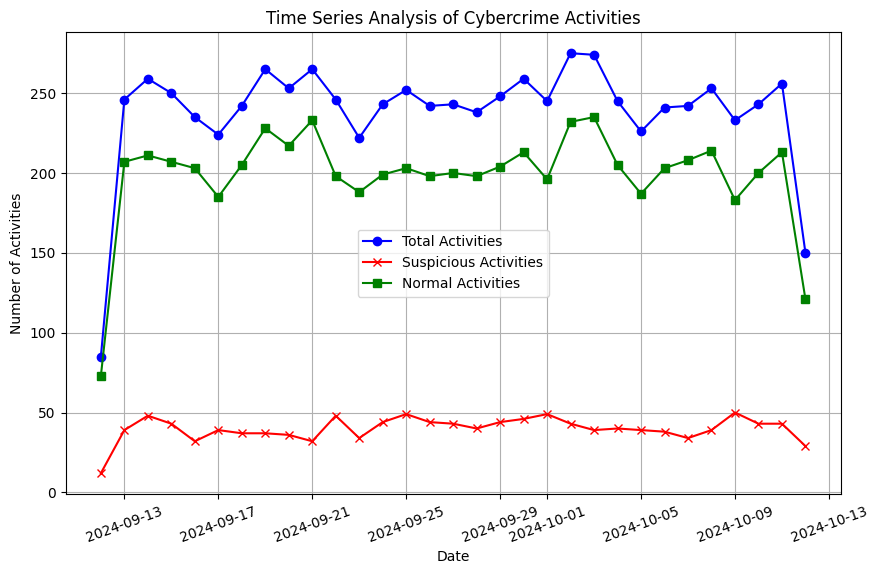

In [ ]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])#[2]

# Set 'Timestamp' as the index of the DataFrame
df.set_index('Timestamp', inplace=True)#[2]

# Resample the data to get daily counts of all activities
daily_activities = df.resample('D').size()#[2]

# Resample to get daily counts of suspicious activities
daily_suspicious_activities = df[df['Label'] == 'Suspicious'].resample('D').size()#[2]

# Resample to get daily counts of normal activities
daily_normal_activities = df[df['Label'] == 'Normal'].resample('D').size()#[2]

# Plotting the time series of total activities
plt.figure(figsize=(10, 6))
plt.plot(daily_activities, label='Total Activities', color='blue', marker='o', linestyle='-')#[2]

# Plotting the time series of suspicious activities
plt.plot(daily_suspicious_activities, label='Suspicious Activities', color='red', marker='x', linestyle='-')#[2]

# Plotting the time series of normal activities
plt.plot(daily_normal_activities, label='Normal Activities', color='green', marker='s', linestyle='-')#[2]

plt.title('Time Series Analysis of Cybercrime Activities')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.legend()
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

##Plot: Kernel Density Estimation (KDE)



 The KDE plot shows that a higher volume of suspicious login attempts occur around 3 attempts. This is similar to normal activities, where the majority of login attempts also peak around 3. However, the key difference is that suspicious activities are more densely concentrated in the range of 1-4 attempts, while normal login attempts exhibit a more spread-out distribution. This shows that suspicious activities are more likely to have lower login attempts.

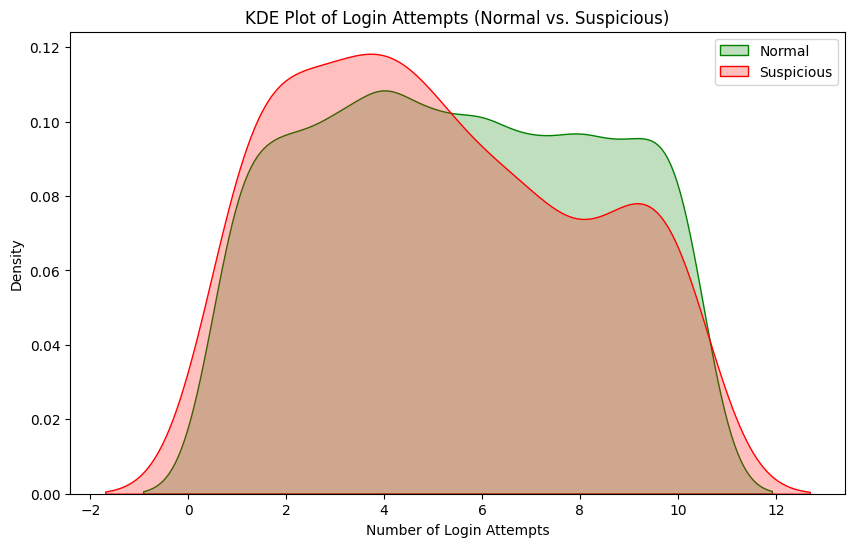

In [ ]:
#[2]

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Label"] == "Normal"]["Login_Attempts"], shade=True, label="Normal", color="green")#[2]
sns.kdeplot(df[df["Label"] == "Suspicious"]["Login_Attempts"], shade=True, label="Suspicious", color="red")#[2]
plt.title("KDE Plot of Login Attempts (Normal vs. Suspicious)")
plt.xlabel("Number of Login Attempts")
plt.ylabel("Density")
plt.legend()
plt.show()

#Exploration Question 1
Are there large file transfers that indicate data exfiltration?




<br> The boxplot that the distribution of file sizes across different anomaly types (DDoS_Attempt, Brute_Force, Data_Exfil, and USB_Access) suggests there is no obvious difference. This shows that the large file transfers do not indicate higher chance of data exfiltration since the distribution of file size among different anomaly types are similar. However, in the box plot it is noticeable that the file size that is in Data_Exfil is slighty below file size compared to DDoS_Attempt. This indicates that data exfiltration events do not necessarily involve the largest file transfers. This ulimately supports the need for a more comprehensive anonmaly detection approach beyond just file size.


Text(0.5, 1.0, 'Boxplot of File_Sieze grouped by Anomaly Type')

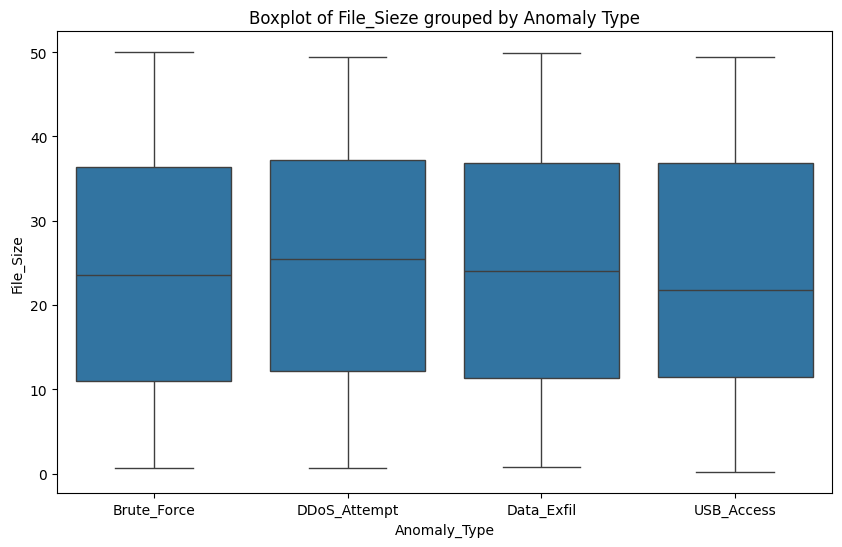

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Anomaly_Type", y="File_Size", data=df)
plt.title('Boxplot of File_Sieze grouped by Anomaly Type')

<Axes: xlabel='Anomaly_Type', ylabel='File_Size'>

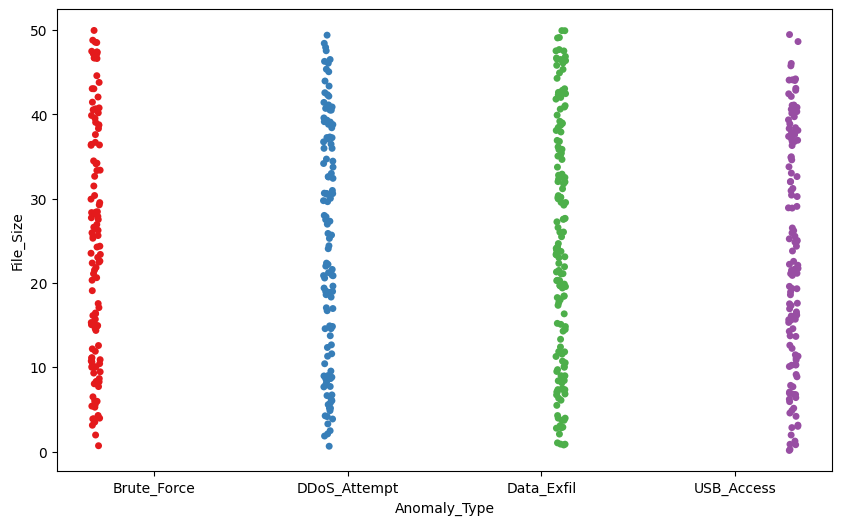

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="Anomaly_Type", y="File_Size", data=df,jitter=True,palette='Set1',dodge=True)

#Exploration Question 2

Is there more activity that happen at night than in the day?

Based on the bar chart, there appears to be slightly higher activity during nighttime compared to daytime for both normal and suspicious activities, though the difference is very pronounced. The normal activity count is higher throughout the night, with some fluctuations but not major. The time series plot (line plot) compares normal and suspicious activities over a 24-hour period while distinguishing between day and night hours. This shows a few peaks during both night and day, suggesting that normal activities are not restricted to working hours and that people like to be on their devices at night. The suspicious activities are consistent during the daytime, but there is a slight increase at night, indicating more unauthorized activities happening during nighttime hours. It is important to know that time of day is not a definitive indicator of suspicious behavior, but combining it with other attributes, such as user actions and access logs, can enhance anomaly detection efforts. This highlights the importance of leveraging machines dynamically to analyze and correlate multiple variables for more efficient threat detection.

In [ ]:

df.reset_index(inplace=True)#[2]

df.loc[(df['Timestamp'].dt.hour >= 6) & (df['Timestamp'].dt.hour < 18), 'Day_Night'] = 'Day'#[2]
df.loc[(df['Timestamp'].dt.hour < 6) | (df['Timestamp'].dt.hour >= 18), 'Day_Night'] = 'Night'#[2]

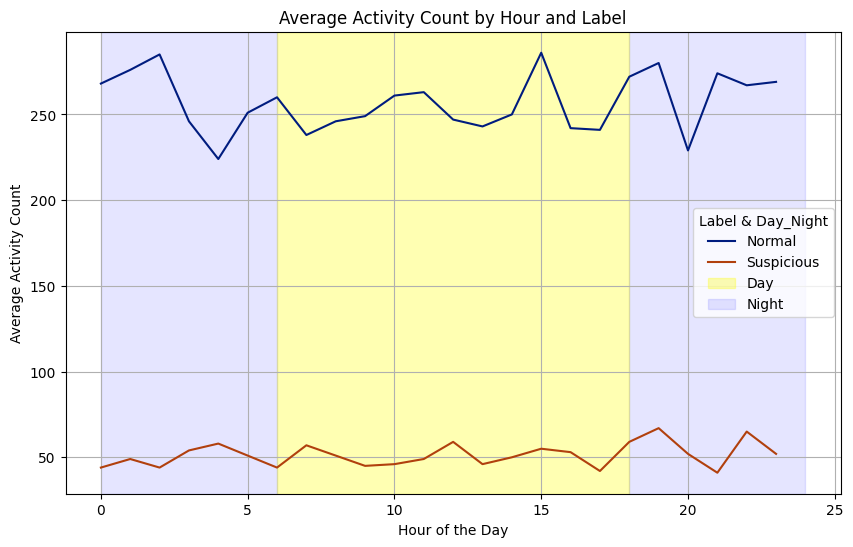

In [ ]:

df['Hour'] = df['Timestamp'].dt.hour
activity_counts = df.groupby(['Hour', 'Label']).size().reset_index(name='Activity_Count')#[2]
average_activities = activity_counts.groupby(['Hour', 'Label'])['Activity_Count'].mean().reset_index()#[2]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Activity_Count', hue='Label', data=average_activities, palette='dark')#[2]
plt.axvspan(6, 18, color='yellow', alpha=0.3, label='Day')#[2]
plt.axvspan(0, 6, color='blue', alpha=0.1)#[2]
plt.axvspan(18, 24, color='blue', alpha=0.1,label='Night')
plt.title('Average Activity Count by Hour and Label')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity Count')
plt.grid(True)
plt.legend(title='Label & Day_Night')
plt.show()

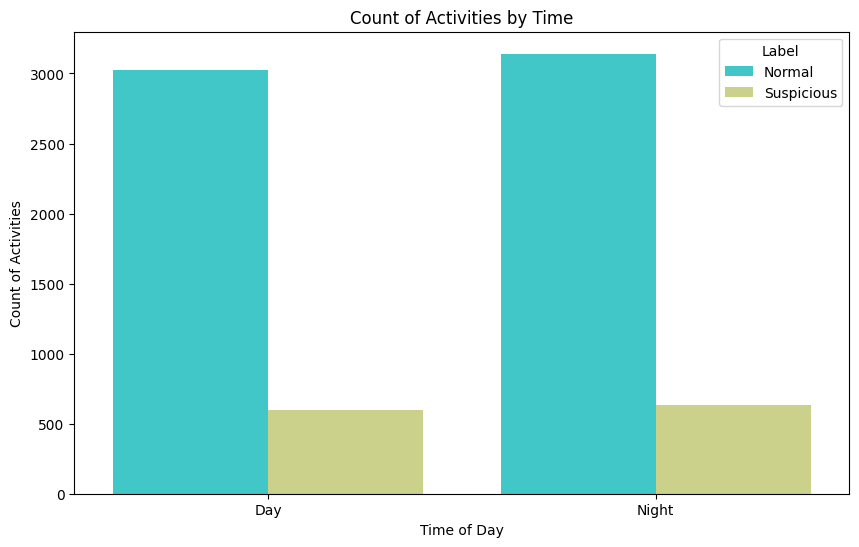

In [ ]:
#[2]

plt.figure(figsize=(10, 6))
sns.countplot(x='Day_Night', hue='Label',data=df, palette='rainbow')#[2]
plt.title('Count of Activities by Time')
plt.xlabel('Time of Day')
plt.ylabel('Count of Activities')
plt.xticks(rotation=0)
plt.show()

#Exploration Question 3



What actions (Action column) are most associated with anomalies?

<br>The heatmap observes which actions are most associated with anomalies based on their frequency across different anomaly types. The delete occurence in the Data_Exfil section is the highest recorded count (63) in the visual which shows that file deletion is a notable action in data exfiltration incidents. Also failed actions had 52 in the USB_Access. Then, write action was prominent in data exfiltration (52) and unauthorized USB access (53), potentially indicating data modification or transfer. With the prevalence of delete, failed, and write actions in Data_Exfil and USB_Access highlights a strong association between these activities and potential cybersecurity threats. Organization can use this information to enhance monitoring and real-time alert system of suspicious activities. Furthermore, identify if anomalies follow predictable patterns that can be used for early detection.

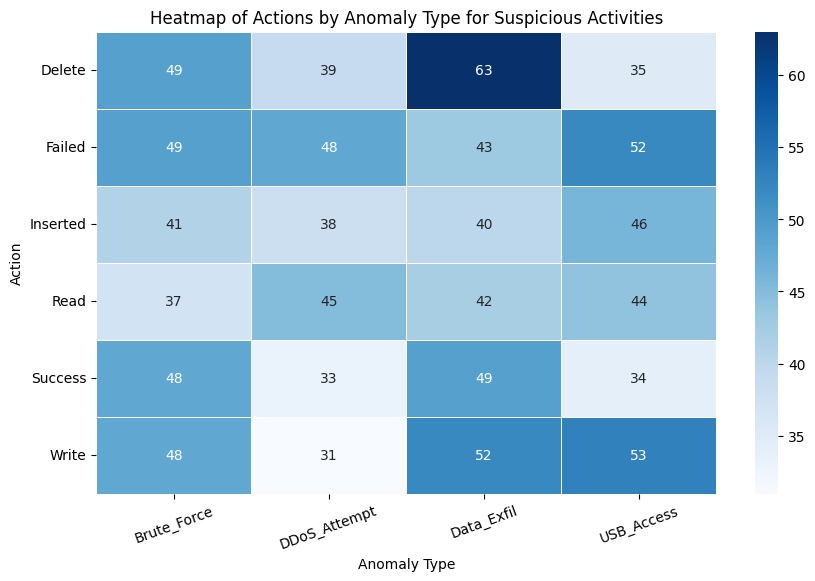

In [ ]:
#[2]

suspicious_data = df[df['Label'] == 'Suspicious']#[2]
action_counts = suspicious_data.groupby(['Action', 'Anomaly_Type']).size().reset_index(name='Counts')#[2]
pivot_table = action_counts.pivot(index='Action', columns='Anomaly_Type', values='Counts').fillna(0)#[2]
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='Blues', linewidths=.5)#[2]
plt.title('Heatmap of Actions by Anomaly Type for Suspicious Activities')
plt.xlabel('Anomaly Type')
plt.ylabel('Action')
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.show()